In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('amazon_revenue_profit.csv', parse_dates = ['Quarter'])
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [5]:
fig = px.line(df, x='Quarter', y = 'Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

Null hypothesis - Series is stationary

Alternative hypothesis = Series is not stationary

In [9]:
from statsmodels.tsa.stattools import kpss

In [10]:
from logging import critical
stats, p, lags, critical_values = kpss(df['Revenue'], 'ct')

<ipython-input-10-aaa4a589331c>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [11]:
print(f'Test Statistics: {stats}')
print(f'p-value:{p}')
print(f'Critical Values:{critical_values}')

if p < 0.05:
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.30665545975169417
p-value:0.01
Critical Values:{'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


Null hypothesis - Series possesses a unit root and hence is not stationary

Alternative Hypothesis - Series is stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Revenue'])

In [14]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: (result{1})')
print(f'Critical Value: {result[4]}')

if result[1] > 0.05:
  print('Series is not Stationary')
else:
  print('Series is stationary')

Test Statistics: -2.444836038197226
p-value: (result1)
Critical Value: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Series is not Stationary


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/content/nyc_energy_consumption.csv')
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [3]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [5]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [6]:
fig = px.line(df, x = 'timeStamp', y = 'demand', title='NYC Energy Demand')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([dict(count=1, label='1y', step='year', stepmode='backward'),
                                   dict(count=2, label='3y', step = 'year', stepmode='backward'),
                                   dict(count=3, label='5y', step="year", stepmode="backward"),
                                   dict(step="all")
                                   ])
                 ))
fig.show()

In [7]:
ny_df = df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

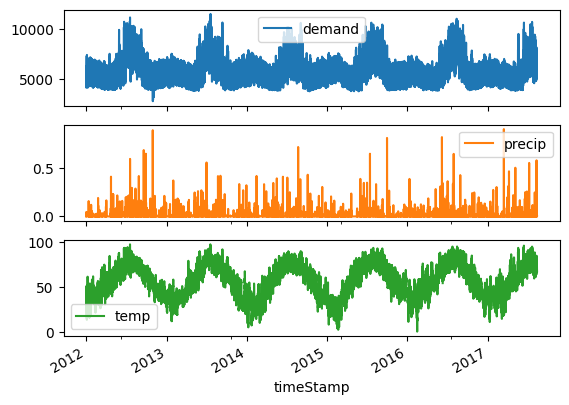

In [8]:
ny_df.plot(subplots=True)

In [9]:
df.query('demand != demand')

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [10]:
df['demand'] = df['demand'].fillna(method='ffill')
df['temp'] = df['temp'].fillna(method='ffill')

In [11]:
print("\nMissing values: ", df.isnull().any())


Missing values:  timeStamp    False
demand       False
precip        True
temp         False
dtype: bool


In [12]:
ny_df = df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

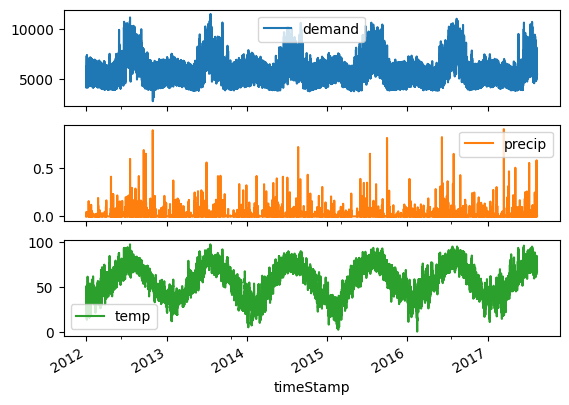

In [13]:
ny_df.plot(subplots=True)

In [14]:
ny_df.resample('M').mean()

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

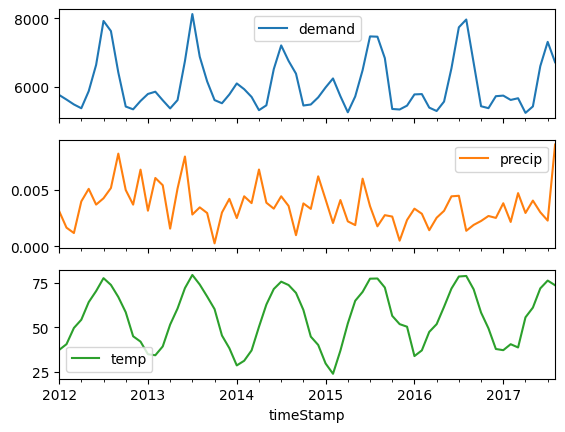

In [15]:
ny_df.resample('M').mean().plot(subplots=True)

In [16]:
ny_df_monthly=ny_df.resample('M').mean()

In [17]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


In [18]:
import pmdarima as pm

In [19]:
model = pm.auto_arima(ny_df_monthly['demand'],
                      m=12, seasonal=True, start_p=0, start_q=0, max_order=4, test='adf',
                      error_action='ignore', suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1024.640, Time=1.32 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.718, Time=0.26 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=1.24 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.32 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1021.850, Time=2.64 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=i

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Tue, 16 Jan 2024   AIC                            993.144
Time:                                         15:00:21   BIC                           1006.461
Sample:                                     01-31-2012   HQIC                           998.420
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.260      4.697      0.000    2168.821    5274.423
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
ny_df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [24]:
train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [25]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [26]:
test.shape

(4, 3)

In [27]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [28]:
forecast = model.predict(n_periods=4, return_conf_int=True)

In [29]:
forecast

(2017-05-31    5320.832641
 2017-06-30    6194.150520
 2017-07-31    7184.108255
 2017-08-31    7297.999709
 Freq: M, dtype: float64,
 array([[4724.37012964, 5917.2951525 ],
        [5391.43558076, 6996.86545858],
        [6358.62011365, 8009.5963956 ],
        [6467.74947806, 8128.24994011]]))

In [31]:
forecast_df = pd.DataFrame(forecast[0], index=test.index, columns = ['Prediction'])

In [32]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5320.832641
2017-06-30,6194.150520
2017-07-31,7184.108255
2017-08-31,7297.999709


<Axes: xlabel='timeStamp'>

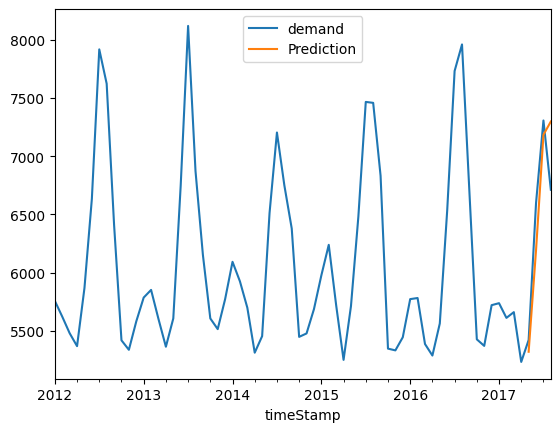

In [33]:
pd.concat([ny_df_monthly['demand'], forecast_df],axis=1).plot()

In [34]:
forecast = model.predict(n_periods=8, return_conf_int=True)

In [35]:
forecast

(2017-05-31    5320.832641
 2017-06-30    6194.150520
 2017-07-31    7184.108255
 2017-08-31    7297.999709
 2017-09-30    6401.927265
 2017-10-31    5789.924167
 2017-11-30    5693.039547
 2017-12-31    5951.573040
 Freq: M, dtype: float64,
 array([[4724.37012964, 5917.2951525 ],
        [5391.43558076, 6996.86545858],
        [6358.62011365, 8009.5963956 ],
        [6467.74947806, 8128.24994011],
        [5553.64732299, 7250.20720672],
        [4934.10749926, 6645.74083498],
        [4837.0853228 , 6548.99377166],
        [5094.94718002, 6808.19889933]]))

In [36]:
forecast_range = pd.date_range(start='2017-05-31', periods=8, freq='M')

In [37]:
forecast1_df = pd.DataFrame(forecast[0],index=forecast_range,columns=['Prediction'])

<Axes: >

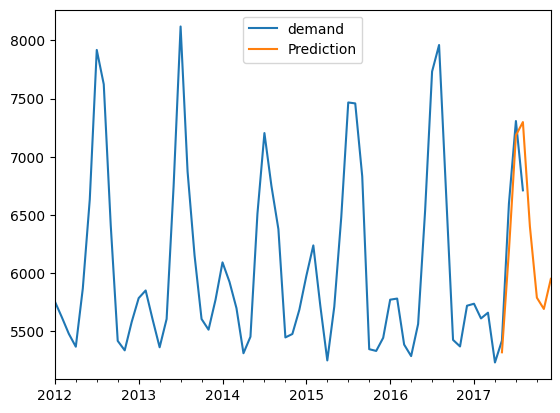

In [38]:
pd.concat([ny_df_monthly['demand'], forecast1_df], axis=1).plot()

In [45]:
lower = pd.Series(forecast[1][:, 0], index=forecast_range)
upper=pd.Series(forecast[1][:, 1], index=forecast_range)

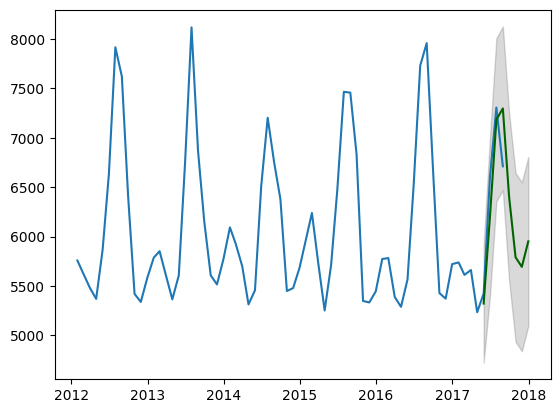

In [46]:
plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range,
                 lower, upper, color='k', alpha=.15)

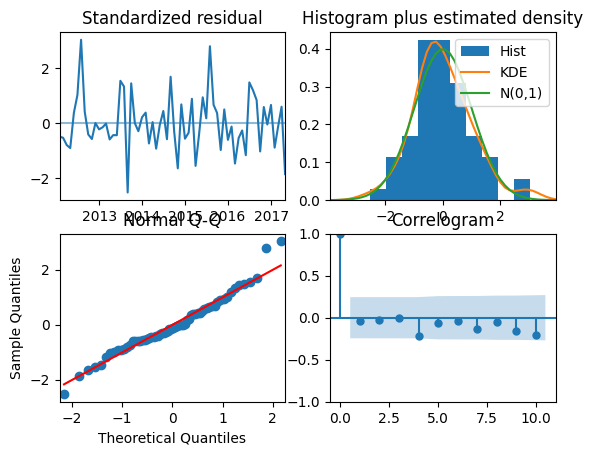

In [47]:
out = model.plot_diagnostics()